<a href="https://colab.research.google.com/github/futurebly/Web-AI/blob/main/Day23_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fashion mnist

## 필요 모듈 가져오기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 데이터 준비

In [ ]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


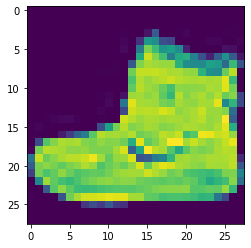

In [ ]:
plt.imshow(trainX[0])

In [ ]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
trainX = trainX.reshape((60000, 28*28))
testX = testX.reshape((10000, 28*28))
print(trainX.shape)

(60000, 784)


In [ ]:
trainX = trainX/255
testX = testX/255

In [ ]:
trainX[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 모델 1

### 모델 만들기

In [ ]:
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(128, activation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


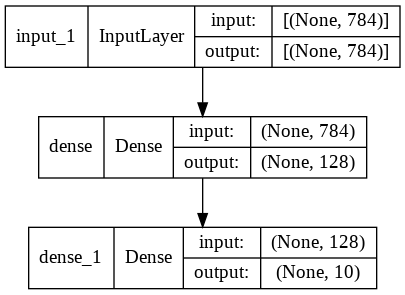

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

### 학습시키기

In [ ]:
hist1 = model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4883 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3624 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.8822
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2783 - accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2625 - accuracy: 0.9031
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2496 - accuracy: 0.9065
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2374 - accuracy: 0.9102
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9134
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.218

### 모델 평가

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.3301 - accuracy: 0.8864


[0.33011946082115173, 0.8863999843597412]

### 예측

In [ ]:
preds = model.predict(testX)

In [ ]:
preds[0]

array([4.6430060e-09, 1.8233352e-06, 5.6751476e-10, 1.9150721e-09,
       3.6998745e-07, 1.4385594e-04, 3.1377168e-09, 1.1697637e-02,
       1.8383238e-07, 9.8815608e-01], dtype=float32)

In [ ]:
np.argmax(preds[0])

9

In [ ]:
testY[0]

9

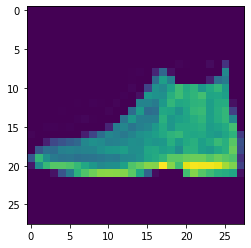

In [ ]:
plt.imshow(testX[0].reshape(28, 28))

## 모델 2

### 모델 만들기

In [ ]:
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish')(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

### 학습 시키기

In [ ]:
hist2 = model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4620 - accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3429 - accuracy: 0.8725
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.8862
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.8959
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9026
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2413 - accuracy: 0.9077
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2264 - accuracy: 0.9136
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2134 - accuracy: 0.9177
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2007 - accuracy: 0.9226
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.189

### 모델 평가

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8823


[0.3640660345554352, 0.8823000192642212]

### 예측하기

In [ ]:
preds = model.predict(testX)
preds[1]

array([3.8345417e-04, 3.0131758e-11, 9.9893206e-01, 8.6252374e-09,
       6.1676762e-04, 1.4542461e-13, 6.7738889e-05, 1.3075488e-14,
       5.8512939e-10, 3.6524334e-13], dtype=float32)

In [ ]:
np.argmax(preds[1])

2

In [ ]:
testY[1]

2

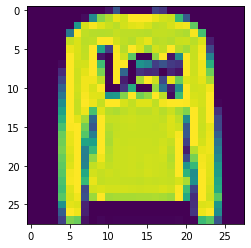

In [ ]:
plt.imshow(testX[1].reshape(28,28))
plt.show()

## 모델3


In [ ]:
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish')(X)
dropout = tf.keras.layers.Dropout(rate=0.5)(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
dropout = tf.keras.layers.Dropout(rate=0.3)(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4663 - accuracy: 0.8306
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3413 - accuracy: 0.8736
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3020 - accuracy: 0.8885
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2787 - accuracy: 0.8948
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9021
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9092
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2261 - accuracy: 0.9138
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2151 - accuracy: 0.9177
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2017 - accuracy: 0.9230
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.191

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8865


[0.32789942622184753, 0.8865000009536743]

# CNN - Dogs vs. Cats

## 필요 모듈 가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model

## 데이터 준비

In [ ]:
#zip 파일 압축 풀기
import os
import zipfile

zip = zipfile.ZipFile('/content/drive/MyDrive/Web+AI 2기/dogs-vs-cats-400.zip', 'r')
zip.extractall('dogs_vs_cats_400')
zip.close()

In [ ]:
DATASET = 'dogs_vs_cats_400'
filenames = os.listdir(DATASET)
filenames

['dog.174.jpg',
 'dog.77.jpg',
 'cat.95.jpg',
 'cat.15.jpg',
 'dog.91.jpg',
 'cat.109.jpg',
 'cat.48.jpg',
 'cat.100.jpg',
 'dog.130.jpg',
 'dog.84.jpg',
 'cat.170.jpg',
 'cat.113.jpg',
 'cat.26.jpg',
 'cat.61.jpg',
 'dog.94.jpg',
 'dog.82.jpg',
 'cat.147.jpg',
 'dog.182.jpg',
 'cat.126.jpg',
 'dog.139.jpg',
 'cat.122.jpg',
 'cat.180.jpg',
 'cat.149.jpg',
 'dog.119.jpg',
 'dog.35.jpg',
 'cat.21.jpg',
 'cat.133.jpg',
 'cat.31.jpg',
 'dog.153.jpg',
 'cat.164.jpg',
 'cat.142.jpg',
 'dog.63.jpg',
 'dog.141.jpg',
 'cat.193.jpg',
 'dog.105.jpg',
 'dog.6.jpg',
 'cat.77.jpg',
 'cat.121.jpg',
 'dog.126.jpg',
 'dog.103.jpg',
 'cat.1.jpg',
 'dog.146.jpg',
 'cat.19.jpg',
 'cat.14.jpg',
 'dog.196.jpg',
 'dog.133.jpg',
 'cat.192.jpg',
 'dog.9.jpg',
 'cat.97.jpg',
 'dog.1.jpg',
 'dog.164.jpg',
 'dog.140.jpg',
 'dog.67.jpg',
 'cat.186.jpg',
 'dog.89.jpg',
 'dog.25.jpg',
 'cat.83.jpg',
 'cat.152.jpg',
 'dog.13.jpg',
 'dog.156.jpg',
 'cat.146.jpg',
 'cat.187.jpg',
 'dog.73.jpg',
 'cat.179.jpg',
 'cat.10

In [ ]:
categories = []
images = []

In [ ]:
for filename in filenames:
  name = filename.split('.')[0]
  if name == 'dog':
    category = 0
  else:
    category = 1
  categories.append(category)
  image = tf.keras.preprocessing.image.load_img(DATASET+'/'+filename, target_size=(160,160))
  imageArr = np.array(image)
  images.append(imageArr)

In [ ]:
categories[0]

0

In [ ]:
images[0]

array([[[229, 220, 225],
        [165, 159, 161],
        [147, 146, 144],
        ...,
        [188, 186, 129],
        [200, 198, 137],
        [195, 185, 160]],

       [[146, 140, 144],
        [ 54,  48,  50],
        [ 41,  40,  38],
        ...,
        [153, 150,  95],
        [136, 134,  75],
        [137, 131,  95]],

       [[167, 161, 165],
        [ 41,  37,  38],
        [ 38,  37,  35],
        ...,
        [132, 129,  78],
        [123, 120,  65],
        [118, 114,  66]],

       ...,

       [[151, 152, 154],
        [ 38,  39,  41],
        [ 41,  42,  44],
        ...,
        [255, 255, 227],
        [255, 248, 219],
        [251, 247, 218]],

       [[158, 160, 159],
        [ 49,  51,  50],
        [ 55,  57,  56],
        ...,
        [255, 252, 223],
        [254, 247, 218],
        [252, 250, 227]],

       [[157, 157, 155],
        [ 52,  52,  50],
        [ 63,  63,  61],
        ...,
        [253, 248, 219],
        [255, 248, 219],
        [253, 252, 232]]

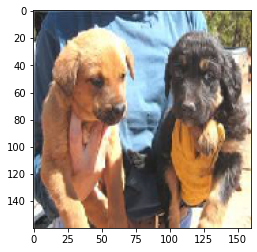

In [ ]:
plt.imshow(images[0])

In [ ]:
categories = np.array(categories)
images = np.array(images)

In [ ]:
categories.shape

(400,)

In [ ]:
images.shape

(400, 160, 160, 3)

In [ ]:
trainX, testX, trainY, testY = train_test_split(images, categories, test_size=0.2, random_state=25)

In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(320, 160, 160, 3) (320,) (80, 160, 160, 3) (80,)


In [ ]:
trainX[0]

array([[[ 72, 114,  94],
        [ 68, 110,  98],
        [ 72, 112, 114],
        ...,
        [189, 220, 241],
        [193, 224, 245],
        [191, 222, 243]],

       [[ 71, 104,  97],
        [ 73, 107, 108],
        [ 81, 113, 126],
        ...,
        [189, 218, 248],
        [192, 221, 251],
        [190, 219, 249]],

       [[ 87, 107, 118],
        [ 75,  94, 111],
        [ 68,  85, 113],
        ...,
        [197, 223, 255],
        [193, 219, 255],
        [191, 217, 254]],

       ...,

       [[  9,  19,  21],
        [ 14,  23,  38],
        [  8,  22,  51],
        ...,
        [  6,  25,  68],
        [  6,  22,  71],
        [  7,  20,  72]],

       [[  7,  17,  19],
        [ 11,  20,  35],
        [  5,  19,  48],
        ...,
        [  6,  25,  68],
        [  6,  22,  71],
        [  8,  21,  73]],

       [[ 11,  21,  23],
        [ 13,  22,  37],
        [  6,  20,  49],
        ...,
        [  6,  24,  70],
        [  6,  22,  71],
        [  8,  21,  74]]

## 정규화 시키기

In [ ]:
trainX = trainX/255
testX = testX/255

In [ ]:
trainX[0]

array([[[0.28235294, 0.44705882, 0.36862745],
        [0.26666667, 0.43137255, 0.38431373],
        [0.28235294, 0.43921569, 0.44705882],
        ...,
        [0.74117647, 0.8627451 , 0.94509804],
        [0.75686275, 0.87843137, 0.96078431],
        [0.74901961, 0.87058824, 0.95294118]],

       [[0.27843137, 0.40784314, 0.38039216],
        [0.28627451, 0.41960784, 0.42352941],
        [0.31764706, 0.44313725, 0.49411765],
        ...,
        [0.74117647, 0.85490196, 0.97254902],
        [0.75294118, 0.86666667, 0.98431373],
        [0.74509804, 0.85882353, 0.97647059]],

       [[0.34117647, 0.41960784, 0.4627451 ],
        [0.29411765, 0.36862745, 0.43529412],
        [0.26666667, 0.33333333, 0.44313725],
        ...,
        [0.77254902, 0.8745098 , 1.        ],
        [0.75686275, 0.85882353, 1.        ],
        [0.74901961, 0.85098039, 0.99607843]],

       ...,

       [[0.03529412, 0.0745098 , 0.08235294],
        [0.05490196, 0.09019608, 0.14901961],
        [0.03137255, 0

### 전처리 끝

## 모델 구성

In [ ]:
X = tf.keras.layers.Input(shape=[160,160,3])
H = tf.keras.layers.Conv2D(16, kernel_size=3, activation='swish', padding='same')(X)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(32, kernel_size=3, activation='swish', padding='same')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(128, activation='swish')(H)
Y = tf.keras.layers.Dense(2, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
hist1 = model.fit(trainX, trainY, epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 48ms/step - loss: 3.5767e-04 - accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 0s 42ms/step - loss: 3.5402e-04 - accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 0s 40ms/step - loss: 3.5033e-04 - accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 40ms/step - loss: 3.4685e-04 - accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 40ms/step - loss: 3.4360e-04 - accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 40ms/step - loss: 3.4013e-04 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 39ms/step - loss: 3.3681e-04 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 41ms/step - loss: 3.3354e-04 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 40ms/step - loss: 3.3013e-04 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 40ms/step - loss:

In [ ]:
model.evaluate(testX, testY)

3/3 [==============================] - 0s 17ms/step - loss: 2.0041 - accuracy: 0.5000


[2.0040860176086426, 0.5]

In [ ]:
preds = model.predict(testX)

In [ ]:
preds[0]

array([8.9313016e-06, 9.9999106e-01], dtype=float32)

In [ ]:
testY[0]

1

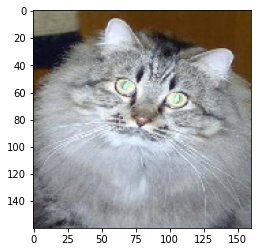

In [ ]:
plt.imshow(testX[0])

In [ ]:
preds[79]

array([8.062363e-05, 9.999194e-01], dtype=float32)

In [ ]:
testY[79]

1

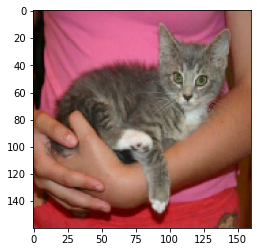

In [ ]:
plt.imshow(testX[79])

[0.98564917 0.01435084]
0


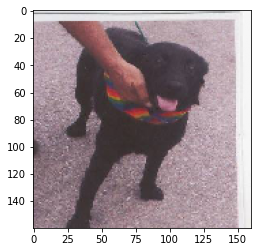

In [ ]:
print(preds[55])
print(testY[55])
plt.imshow(testX[55])

[0.88388604 0.11611395]
1


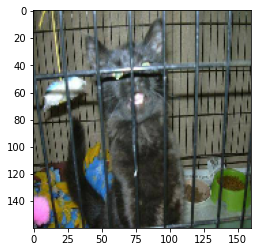

In [ ]:
print(preds[47])
print(testY[47])
plt.imshow(testX[47])

[0.89305866 0.10694135]
1


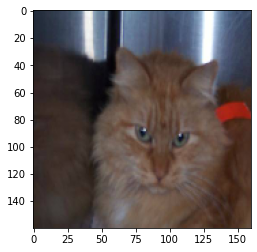

In [ ]:
print(preds[23])
print(testY[23])
plt.imshow(testX[23])

## 모델 저장

In [ ]:
model.save('dogs_vs_cats.h5')

## 모델 불러오기

In [ ]:
importModel = tf.keras.models.load_model('dogs_vs_cats.h5')

In [ ]:
image = tf.keras.preprocessing.image.load_img('test1.jpg', target_size=(160,160))
imageArr = np.array(image)

In [ ]:
imageArr

array([[[ 63,  51,  35],
        [ 69,  53,  40],
        [ 72,  53,  46],
        ...,
        [ 34,  29,  26],
        [ 52,  47,  44],
        [ 65,  61,  52]],

       [[ 63,  51,  35],
        [ 66,  50,  37],
        [ 72,  53,  46],
        ...,
        [ 35,  30,  27],
        [ 54,  49,  46],
        [ 68,  64,  55]],

       [[ 57,  45,  29],
        [ 64,  48,  35],
        [ 65,  46,  39],
        ...,
        [ 35,  30,  27],
        [ 56,  51,  48],
        [ 69,  65,  56]],

       ...,

       [[ 41,  34,  28],
        [ 48,  35,  26],
        [ 70,  52,  40],
        ...,
        [123, 117, 117],
        [120, 114, 114],
        [111, 105, 105]],

       [[ 44,  37,  31],
        [ 46,  33,  24],
        [ 64,  46,  34],
        ...,
        [120, 114, 114],
        [117, 111, 111],
        [126, 120, 120]],

       [[ 44,  37,  31],
        [ 45,  32,  23],
        [ 62,  44,  32],
        ...,
        [114, 108, 108],
        [110, 104, 104],
        [111, 105, 105]]

In [ ]:
imageArr = imageArr/255

In [ ]:
imageArr.shape

(160, 160, 3)

In [ ]:
imageArr = imageArr.reshape(1, 160, 160, 3)

In [ ]:
preds = importModel.predict(imageArr)
preds

array([[0.7142022 , 0.28579777]], dtype=float32)